In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r'D:\MY DATA\DATA\DSA\Regression_Case_Study\car_age_price.csv')

In [5]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [7]:
data.tail()

,Year,Price
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000
111,2015,425000


In [9]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [11]:
x = data.drop('Price',axis=1)
y = data['Price']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42) 
x_train.head()

,Year
66,2017
90,2017
62,2017
22,2015
85,2015


## Linear Regression 

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(x_train,y_train)

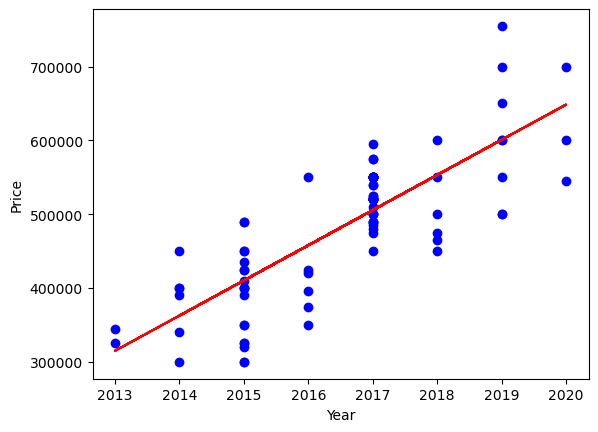

In [19]:
plt.scatter(x_train,y_train,color = 'blue')
plt.plot(x_train, model.predict(x_train), color = 'red') 
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [21]:
predictions = model.predict(x_test)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error = ", mean_squared_error(y_test,predictions)) 
print("R Squared Error = ", r2_score(y_test,predictions))

Mean Squared Error =  4326906256.829671
R Squared Error =  0.36759313425902185


## Predict Price in 2022

In [25]:
value = model.predict([[2022]]) #83 is bill amount
value

C:\Users\AL792\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([743601.61594504])

## Lasso regularization 

In [30]:
from sklearn.linear_model import Lasso

In [32]:
lasso = Lasso(alpha=0.001, max_iter=10000)

In [34]:
lasso.fit(x_train, y_train)

Lasso(alpha=0.001, max_iter=10000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


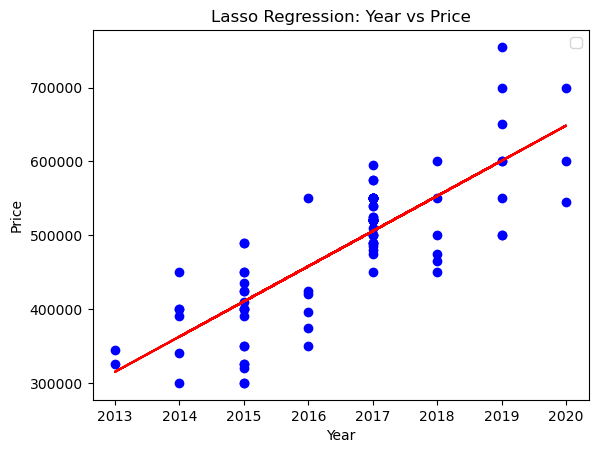

In [46]:
plt.scatter(x_train,y_train, color='blue')
plt.plot(x_train, lasso.predict(x_train), color='red')
plt.title('Lasso Regression: Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

In [36]:
y_train_predictions = lasso.predict(x_train)
y_test_predictions = lasso.predict(x_test)

In [40]:
train_mse = mean_squared_error(y_train, y_train_predictions)
test_mse = mean_squared_error(y_test, y_test_predictions)
train_r2 = r2_score(y_train, y_train_predictions)
test_r2 = r2_score(y_test, y_test_predictions)

In [42]:
print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R-squared: {train_r2}")
print(f"Testing R-squared: {test_r2}")

Training MSE: 3107285246.1635475
Testing MSE: 4326906210.343814
Training R-squared: 0.638935425375587
Testing R-squared: 0.3675931410532469


In [48]:
lasso_value = lasso.predict([[2022]]) 
lasso_value

C:\Users\AL792\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([743601.61370337])